In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('clinic.csv')

In [3]:
list(df.columns)
# ID: ID de la matrix a la que hace referencia (fichero.csv).
# redcap_event_name: 'redcap_event_name' puede representar diferentes eventos o puntos de tiempo ({'baseline_arm_1','followup1_arm_1',nan,'year2_arm_1','year3_arm_1','year5_arm_1'}).
# controls_ms: Controls (0) i Pacients (1).
# dob: Date of Birth.
# msonset: Quan va començar la EM.
# ¿? nrldate: Data de ...
# age: Edat
# sex: Sexe femeni (0) o masculi (1)
# dd: Durada de la malaltia.
# mstype: Multiple Sclerosis Type ((0) RRMS, (1) SPMS i (2) PPMS).
    # Relapsing-remitting Multiple Sclerosis (RRMS):
    # Secondary Progressive MS (SPMS): 
    # Primary Progressive MS (PPMS): 
    
# ¿? dmd: Duchenne muscular dystrophy (DMD) ¿¿¿¿????? is a genetic disorder characterized by progressive muscle degeneration and weakness due to the alterations of a protein called dystrophin that helps keep muscle cells intact.
# edss: Escala de gravetat de la malaltia (EDSS): de 0 (sense símptomes) a 10 (mort).
# ¿? uGMSSS:
# ¿? oGMSSS:
# sdmt: Symbol Digit Modalities Test (Prova de Símbols i Dígits Modalitats):  per mesurar el rendiment cognitiu, especialment en les àrees de l'atenció, la velocitat de processament de la informació i les habilitats visuomotores.
# ¿? sdmtz: Symbol Digit Modalities Test Standarized.
# pasat: Paced Auditory Serial Addition Test (Prova d'Addició Sèrial Auditiva a Ritme Controlat):  avaluar diverses funcions cognitives, incloent l'atenció, la memòria de treball i la velocitat de processament de la informació.
# zpasat: Puntuació estandaritzada sobre la prova auditiva.
# zverbalmemory: Puntuació estandaritzada (z) sobre la memoria verbal del pacient.
# zvisualmemory: Puntuació estandaritzada (z) sobre la memoria visual del pacient. 
# zattention: Puntuació estandaritzada (z) sobre l'atenció del pacient.
# zfluency: Puntuació estandaritzada (z) sobre la fluidesa del pacient.
# zglobal: Puntuació estandaritzada (z) sobre el rendiment cognitiu global del pacient.
# FA: ¿? Tot 1s
# GM: ¿? Tot 1s
# RF: ¿? Tot 1s

['Unnamed: 0',
 'id',
 'redcap_event_name',
 'controls_ms',
 'dob',
 'msonset',
 'nrldate',
 'age',
 'sex',
 'dd',
 'mstype',
 'dmd',
 'edss',
 'uGMSSS',
 'oGMSSS',
 'sdmt',
 'sdmtz',
 'pasat',
 'zpasat',
 'zverbalmemory',
 'zvisualmemory',
 'zattention',
 'zfluency',
 'zglobal',
 'FA',
 'GM',
 'RF']

In [4]:
df['controls_ms'].value_counts(normalize=True)

1    0.890909
0    0.109091
Name: controls_ms, dtype: float64

In [5]:
set(df['redcap_event_name'])

{'baseline_arm_1',
 'followup1_arm_1',
 nan,
 'year2_arm_1',
 'year3_arm_1',
 'year5_arm_1'}

In [6]:
print(f"Actualment, podem observar que tenim {len(df[df['controls_ms'] == 0])} voluntaris sans.")
print(f"Actualment, podem observar que tenim {len(df[df['controls_ms'] == 1])} pacients EM.")

Actualment, podem observar que tenim 18 voluntaris sans.
Actualment, podem observar que tenim 147 pacients EM.


In [7]:
df[df['controls_ms'] == 1]['mstype']

0      1
1      2
2      0
3      0
4      0
      ..
152    0
153    0
154    0
155    0
156    1
Name: mstype, Length: 147, dtype: int64

In [8]:
grouped_df = df.groupby(['controls_ms', 'sex'])
grouped_df.mean()

#mean_scores = grouped_df['Score'].mean()


Unnamed: 0        age         dd    mstype       dmd  \
controls_ms sex                                                         
0           0    122.533333  36.454936  -1.000000 -1.000000       NaN   
            1    110.333333  37.432758  -1.000000 -1.000000       NaN   
1           0     76.913462  47.049615  15.607404  0.173077  2.582524   
            1     78.186047  48.008605  16.816512  0.232558  2.395349   

                     edss    uGMSSS    oGMSSS       sdmt     sdmtz      pasat  \
controls_ms sex                                                                 
0           0    0.000000       NaN       NaN        NaN       NaN        NaN   
            1    0.000000       NaN       NaN        NaN       NaN        NaN   
1           0    2.538462  2.984615  2.468029  48.494118  0.144224  44.258065   
            1    2.953488  3.143721  2.582395  46.783784 -0.070745  45.395349   

                   zpasat  zverbalmemory  zvisualmemory  zattention  zfluency  \
controls_ms sex                                                                 
0           0         NaN            NaN            NaN         NaN       NaN   
            1         NaN            NaN            NaN         NaN       NaN   
1           0   -0.406750      -0.561242      -0.576851   -0.107851 -0.455882   
            1   -0.030164      -1.418763      -0.301316   -0.688263 -1.135337   

                  zglobal   FA   GM   RF  
controls_ms sex                           
0           0         NaN  1.0  1.0  1.0  
            1         NaN  1.0  1.0  1.0  
1           0   -0.407777  1.0  1.0  1.0  
            1   -0.885916  1.0  1.0  1.0

### 1. Etapes de preprocessament. 

Considera els factors de confusió:


- Has de realitzar una correcció per edat i sexe utilitzant una regressió lineal per comptabilitzar la variabilitat deguda a aquests factors.
- Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.
- És necessari normalitzar les dades per assegurar que totes les mesures siguin comparables entre si per a l'anàlisi multicapa.
- Harmonitza els pesos amb ComBat (https://github.com/Jfortin1/ComBatHarmonization), ja que hi ha dos tipus d'adquisicions diferents: MSVIS i FIS.
- Considera la possible aplicació de llindars (<0.1) i el filtratge de connexions que no superin més del 60% en la població de subjectes sans.
- Realitza un estudi de les dades demogràfiques dels subjectes per verificar si hi ha diferenciació entre els grups (mitjançant fenotips o a través d'una classificació basada en la durada de la malaltia).

**NOTA: Preprocessament complet al fitxer 'Before PipeLine'**

In [9]:
# Anàlisi descriptiva per grup (MS or HV).
descriptive_stats = df.groupby('controls_ms').describe()

# Prova t-test per 'edat', segons el grup (MS or HV).
t_stat, p_value = ttest_ind(df[df['controls_ms'] == 1]['age'], df[df['controls_ms'] == 0]['age'])

# Visualització de les diferències d'edat segons el grup corresponent.
sns.boxplot(x='controls_ms', y='age', data=df)

# Prova t-test per 'edat', segons el grup (MS or HV).
t_stat, p_value = ttest_ind(df[df['controls_ms'] == 1]['age'], df[df['controls_ms'] == 0]['age'])
print("Pvalue(age)<0.05:", p_value<0.05)

NameError: name 'ttest_ind' is not defined

In [ ]:
print("Podem observar una aparença de regressió lineal entre la gravetat de la malaltia i l'edat.")


In [ ]:
# Correlation analysis.
correlation_matrix = df[['controls_ms', 'age', 'sex', 'dd', 'mstype','dmd','edss','sdmt','sdmtz','pasat','zpasat','zverbalmemory','zvisualmemory','zattention','zfluency','zglobal']].corr()

# Heatmap de la correlació de variables.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [10]:
print("Podem observar com les variables 'age' té una correlació del 0.32 amb si el pacient es MS o no. D'altra banda, la variable 'sex', no mostra una correlació gran, ja que presenta un valor de 0.09 .")

Podem observar com les variables 'age' té una correlació del 0.32 amb si el pacient es MS o no. D'altra banda, la variable 'sex', no mostra una correlació gran, ja que presenta un valor de 0.09 .


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Obtenim dades d'edat i sexe.
X = df[['age', 'sex']]
y = df['controls_ms']

# Dividim les dades en Train i Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el model de regressió lineal.
model = LinearRegression()

# Entrena el model amb les dades d'entrenament.
model.fit(X_train, y_train)

# Fes prediccions amb les dades de prova.
y_pred = model.predict(X_test)

# Avalua el model.
print('R2 score (proporció de variancia):', metrics.r2_score(y_test, y_pred))
# Higher R2 Score -> Model fits better

# Aplica la correcció a la variable 'age' les variables d'entrada.
df['age_corrected']  = df['age'] - model.predict(df[['age', 'sex']])
df['age_corrected'][0:5]


R2 score (proporció de variancia): 0.1062619166930846


0    50.580434
1    57.071384
2    59.740548
3    37.156802
4    51.704053
Name: age_corrected, dtype: float64

In [12]:
# Obtenim els coeficients.
coef_edat = model.coef_[0]
coef_sexe = model.coef_[1]

print(f"Coeficient d'Edat (β_edat): {coef_edat}")
# 'age' > 0: a mesura que augmenta l'edat, augmenten les probabilitats de ser pacient de EM.
print(f"Coeficient de Sexe (β_sexe): {coef_sexe}")
# 'sex' > 0: sexe masculi, té més prob. d, augmentee ser pacient amb EM.


Coeficient d'Edat (β_edat): 0.009717436746906338
Coeficient de Sexe (β_sexe): 0.02440525260908353


In [13]:
df['age_binned'] = pd.cut(df['age'], 
    bins=[0,18,30,40,50,70,float('inf')],
    labels=['0-18','19-30','31-40','41-50', '51-70','71-+']
  )


In [14]:
# Imputació de valors null
# Check which columns has null values.
for col in df.columns:
    if df[col].isna().any():
        print(f"Column {col} needs imputation in NULL values.")


Column redcap_event_name needs imputation in NULL values.
Column dob needs imputation in NULL values.
Column msonset needs imputation in NULL values.
Column nrldate needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.


In [15]:
# Separate data into HV or MS.
# 'redcap_event_name': Ha de ser null per HV.
df[df['controls_ms'] == 0]['redcap_event_name']
df[df['controls_ms'] == 1]['redcap_event_name']

# No aplicarem 'dob': date of birth a l'analisis, sino 'age i 'sex'.
# No aplicarem 'msonset' a l'analisis.
# No aplicarem 'nrldate' a l'analisis.

# dmd, uGMSSS, oGMSSS: Només NULLs per HV volunteers.


0         year3_arm_1
1         year5_arm_1
2         year5_arm_1
3         year5_arm_1
4         year5_arm_1
            ...      
152    baseline_arm_1
153    baseline_arm_1
154    baseline_arm_1
155    baseline_arm_1
156    baseline_arm_1
Name: redcap_event_name, Length: 147, dtype: object

In [16]:
df[df['controls_ms'] == 1]['zglobal'].isna().sum()


85

In [17]:
df['zglobal']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
160   NaN
161   NaN
162   NaN
163   NaN
164   NaN
Name: zglobal, Length: 165, dtype: float64

In [18]:
np.std(df[df['controls_ms'] == 1]['sdmt'])


13.296408435778844

In [19]:
# Paràmetres
mitjana = 47.975
desviacio_estandard = 13.297

# Generar 25 valors aleatoris amb una distribució normal
valors_sdmt = np.random.normal(mitjana, desviacio_estandard, 25)

# Arrodoneix els valors a nombres sencers si cal
valors_sdmt = np.round(valors_sdmt).astype(int)

# Mostra els valors generats
print(valors_sdmt)


[21 41 60 48 61 65 37 25 28 46 42 65 53 52 49 33 52 68 52 60 57 68 34 56
 46]


In [20]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

In [21]:
# Carreguem matrius.
import os

structural_data = 'subject_networks_rfMRI_v1'

#type_data = '_FA_factor.csv' # Functional data
type_data = '_r_matrix.csv' # Structural data

# Llegim matriu MS 'MSVIS'.
columns_nodes = list(dict_data.values())
functional_matrix_MSVIS = pd.read_csv(os.path.join(os.getcwd(), structural_data, '002MSVIS_r_matrix.csv'), header=None)
functional_matrix_MSVIS.columns = columns_nodes
functional_matrix_MSVIS.set_index(pd.Index(columns_nodes), inplace=True)
#functional_matrix_MSVIS

# Llegim matriu MS 'FIS'.
functional_matrix_FIS = pd.read_csv(os.path.join(os.getcwd(), structural_data, 'FIS_129_r_matrix.csv'), header=None)
functional_matrix_FIS.columns = columns_nodes
functional_matrix_FIS.set_index(pd.Index(columns_nodes), inplace=True)
#functional_matrix_FIS


llista_matrices = list()

# Iterem tots els pacients.
for index, row in df.iterrows():
    functional_matrix = pd.read_csv(os.path.join(os.getcwd(), structural_data, row['id'] + type_data), header=None)
    llista_matrices.append(functional_matrix)

result_matrix = np.concatenate(llista_matrices, axis=1)
print("Result Matrix:")
print(result_matrix)
print(result_matrix.shape)

Result Matrix:
[[ 1.        0.32233   0.291303 ... -0.181859  0.306673  0.311649]
 [ 0.32233   1.        0.744621 ... -0.245414 -0.372739 -0.295594]
 [ 0.291303  0.744621  1.       ... -0.288005 -0.127269 -0.162121]
 ...
 [ 0.19726   0.487426  0.541862 ...  1.        0.170568  0.619358]
 [ 0.477953  0.772869  0.711695 ...  0.170568  1.        0.467037]
 [ 0.320075  0.492102  0.563075 ...  0.619358  0.467037  1.      ]]
(76, 12540)


In [22]:
# Normalitzem les dades.
from sklearn.preprocessing import StandardScaler

# Normalitzem 1 matriu.
scaler = StandardScaler()
functional_matrix_MSVIS_normalized = scaler.fit_transform(functional_matrix_MSVIS)
#print("Normalized: ", functional_matrix_MSVIS_normalized)
#print()

normalized_llista_matrices = list()
for matrix in llista_matrices:
    normalized_matrix = scaler.fit_transform(matrix)
    normalized_llista_matrices.append(normalized_matrix)

normalized_result_matrix = np.concatenate(normalized_llista_matrices, axis=1)
print("Result Normalized Matrix:")
print(normalized_result_matrix)
print()
print("SHAPE:", normalized_result_matrix.shape)

Result Normalized Matrix:
[[ 3.59598675 -0.04825716 -0.22406934 ... -0.54963185  0.89800932
   0.68362633]
 [ 0.43524338  1.55425232  1.08485192 ... -0.75276942 -1.58701291
  -1.04178939]
 [ 0.29052931  0.95034884  1.82223937 ... -0.88890084 -0.68918007
  -0.6625402 ]
 ...
 [-0.1480998   0.34215101  0.49940072 ...  3.22788318  0.40019069
   1.55794837]
 [ 1.16108983  1.01714786  0.9897806  ...  0.57681241  3.43392717
   1.12514463]
 [ 0.42472576  0.35320851  0.56065165 ...  2.01125677  1.48455785
   2.6395017 ]]

SHAPE: (76, 12540)


In [23]:
# Harmonitza els pesos amb neuroCombat, ja que hi ha dos tipus d'adquisicions diferents: MSVIS i FIS.
from neuroCombat import neuroCombat

batch_list = [index for index, row in df.iterrows() for _ in range(0, 76)]

data_combat = neuroCombat(
    dat=normalized_result_matrix,
    covars=pd.DataFrame({'batch': batch_list}),
    batch_col = 'batch'
)['data']

print("Data NeuroCombat:")
print(data_combat)

# Obtenim el nombre de matrius que volem desfer.
nombre_matrius = len(normalized_llista_matrices)

# Obtenim totes les matrius en format original, despres d'apllicar harmonització de pesos.
matrius_originals = np.split(data_combat, nombre_matrius, axis=1)
len(matrius_originals)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data
Data NeuroCombat:
[[ 4.39332195  0.01151191 -0.19988327 ... -0.77600336  0.73848412
   0.51420177]
 [ 0.2887753   1.32560293  0.89067584 ... -0.64333466 -1.35596089
  -0.89022086]
 [ 0.06789726  0.86411421  1.91624132 ... -0.93694986 -0.74742781
  -0.72214831]
 ...
 [-0.36981445  0.23051281  0.42306995 ...  2.83302192  0.64115129
   1.53858093]
 [ 0.8954014   0.73588023  0.70555095 ...  0.4687903   2.98669295
   0.95202155]
 [ 0.10963787 -0.00743057  0.33213849 ...  1.62097835  1.1883161
   2.13705661]]


165

In [24]:
# Considera la possible aplicació de llindars (<0.1).
functional_matrix_copy = functional_matrix

functional_matrix[functional_matrix < 0.1] = 0


In [25]:
# Filtratge de connexions que no superin més del 60% en la població de subjectes sans.
percentatge_minim = 0.6

# S'obté la matriu comuna bàsica de 0s.
matriu_comuna = np.zeros_like(functional_matrix)

# Iterem els subjectes sans.
for index, row in df[df['controls_ms'] == 0].iterrows():
    # Obtenim la matriu de l'individu sa.
    matrix=llista_matrices[index]
    
    # Si les posicions de la matriu son més gran que 0, es suma el valor de 1 a la matriu comuna.
    matriu_comuna += (matrix > 0).astype(int)

# S'obtenen les connexions que no presenten un percentatge minim.
connexions_a_filtrar = matriu_comuna < percentatge_minim*(len(df[df['controls_ms'] == 0]))

# Les connexions que no passen el threshold de valor minim de connexions en les altres matrius, s'eliminen assignant un 0 a la matriu comuna.
matriu_comuna[connexions_a_filtrar] = 0
matriu_comuna

filtered_matrices = list()
# S'aplica la matriu comuna a tots els individus sans.
for index, row in df.iterrows():
    # S'obté la matriu iterada.
    matrix=llista_matrices[index]
    # S'eliminen les connexions que no han passat el threshold (percentatge de connexions).
    matrix[matriu_comuna == 0] = 0
    
    # S'afegeix al llistat de matrius filtrades.
    filtered_matrices.append(matrix)
    

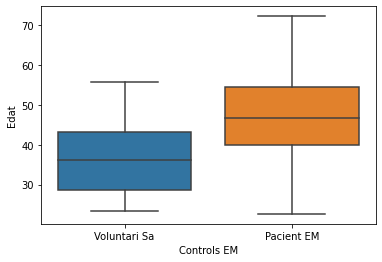

Pvalue(age)<0.05: True


In [26]:
# - Realitza un estudi de les dades demogràfiques dels subjectes per verificar si hi ha diferenciació entre els grups (mitjançant fenotips o a través d'una classificació basada en la durada de la malaltia).
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# Anàlisi descriptiva per grup (MS or HV).
descriptive_stats = df.groupby('controls_ms').describe()

# Prova t-test per 'edat', segons el grup (MS or HV).
t_stat, p_value = ttest_ind(df[df['controls_ms'] == 1]['age'], df[df['controls_ms'] == 0]['age'])

# Visualització de les diferències d'edat segons el grup corresponent.
sns.boxplot(x='controls_ms', y='age', data=df)
plt.xticks([0, 1], ["Voluntari Sa", "Pacient EM"])
plt.ylabel("Edat")
plt.xlabel("Controls EM")
plt.show()
print("Pvalue(age)<0.05:", p_value<0.05)


<AxesSubplot:xlabel='redcap_event_name', ylabel='dd'>

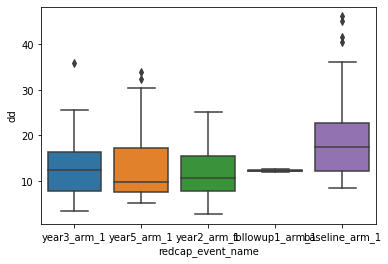

In [27]:
# Punts de la malaltia - Durada de la malaltia.
sns.boxplot(x='redcap_event_name', y='dd', data=df)


<AxesSubplot:xlabel='mstype', ylabel='dd'>

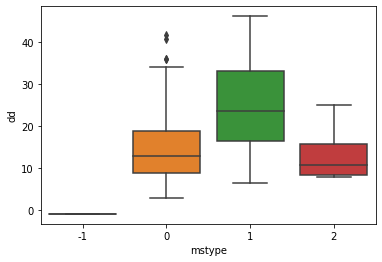

In [28]:
# Tipus d'EM - Durada de la malaltia
sns.boxplot(x='mstype', y='dd', data=df)

<AxesSubplot:xlabel='age_binned', ylabel='dd'>

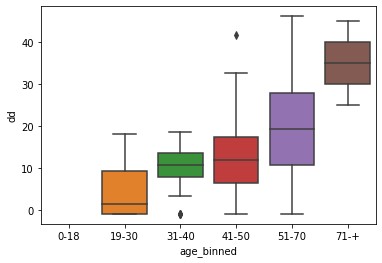

In [29]:
# Diferenciació de grups entre:

# Grups d'edat - Durada de la malaltia
sns.boxplot(x='age_binned', y='dd', data=df)


<AxesSubplot:xlabel='mstype', ylabel='age'>

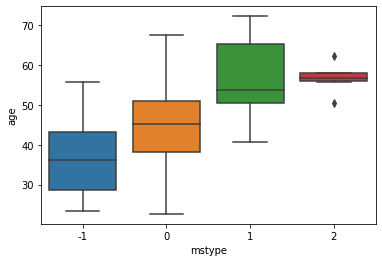

In [30]:
# Tipus D'EM - Edat
sns.boxplot(x='mstype', y='age', data=df)


<AxesSubplot:xlabel='age_binned', ylabel='edss'>

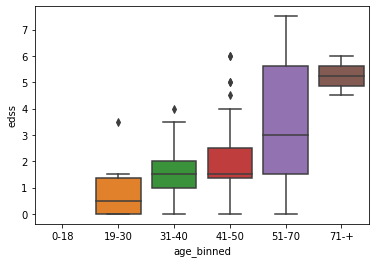

In [31]:
# Edat - Gravetat de la malaltia
sns.boxplot(x='age_binned', y='edss', data=df)


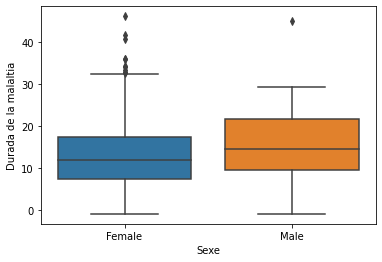

In [32]:
# Sex - Durada de la malaltia
sns.boxplot(x='sex', y='dd', data=df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel("Sexe")
plt.ylabel("Durada de la malaltia")
plt.show()

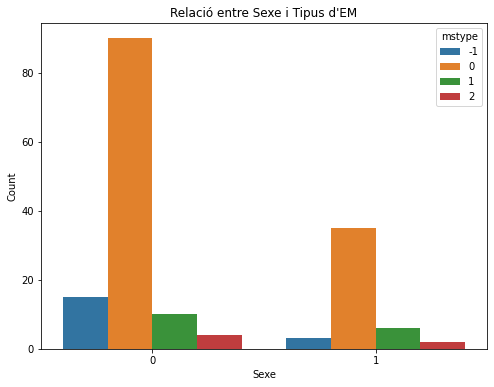

In [33]:
# Sex - Tipus d'EM.
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='mstype', data=df)
plt.title('Relació entre Sexe i Tipus d\'EM')
plt.xlabel('Sexe')
plt.ylabel('Count')
plt.show()

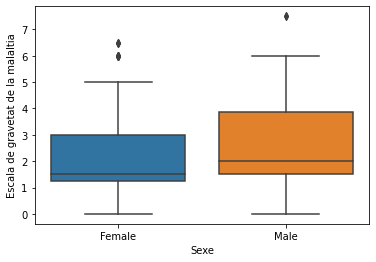

In [34]:
# Sex - Gravetat de la malaltia
sns.boxplot(x='sex', y='edss', data=df)
plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Sexe")
plt.ylabel("Escala de gravetat de la malaltia")
plt.show()

In [35]:
set(df['age_binned'])

{'19-30', '31-40', '41-50', '51-70', '71-+'}

In [36]:
from scipy.stats import f_oneway

# Obtenim només pacients d'EM per dur a terme l'estudi.
df_MS = df[df['controls_ms'] == 1]

# Tipus d'Esclerosis Multiple - Grups d'edat
# Grups d'edat - Gravetat de la malaltia

# Grups d'edat - Durada de la malaltia (dd)
# Dividim les dades per grups d'edat, per la durada de la malaltia.
grup_0_dd = df_MS[df_MS['age_binned'] == '19-30']['dd']
grup_1_dd = df_MS[df_MS['age_binned'] == '31-40']['dd']
grup_2_dd = df_MS[df_MS['age_binned'] == '41-50']['dd']
grup_3_dd = df_MS[df_MS['age_binned'] == '51-70']['dd']
grup_4_dd = df_MS[df_MS['age_binned'] == '71-+']['dd']

# Realitzem prova de one-way ANOVA per comparar mitjanes de grups.
anova_result_dd = f_oneway(grup_0_dd, grup_1_dd, grup_2_dd, grup_3_dd, grup_4_dd)

# Print the results
print("One-way ANOVA results Grups d'edat - Durada de la malaltia:")
print("F-statistic:", anova_result_dd.statistic)
print("P-value:", anova_result_dd.pvalue)
print(f"P-value<0.05: {anova_result_dd.pvalue<0.05}")
print()


# Tipus d'Esclerosis Multiple (mstype) - Edat
# Dividim les dades per grups d'EM, per edat.
grup_0 = df_MS[df_MS['mstype'] == 0]['age']
grup_1 = df_MS[df_MS['mstype'] == 1]['age']
grup_2 = df_MS[df_MS['mstype'] == 2]['age']

# Realitzem prova de one-way ANOVA per comparar mitjanes de grups.
anova_result_mstype = f_oneway(grup_0, grup_1, grup_2)

# Print the results
print("One-way ANOVA results Tipus d\'EM - Edat:")
print("F-statistic:", anova_result_mstype.statistic)
print("P-value:", anova_result_mstype.pvalue)
print(f"P-value<0.05: {anova_result_mstype.pvalue<0.05}")
print()


# Grups d'edat - Gravetat de la malaltia (edss)
# Dividim les dades per grups d'edat, per la gravetat de la malaltia.
grup_0_edss = df_MS[df_MS['age_binned'] == '19-30']['edss']
grup_1_edss = df_MS[df_MS['age_binned'] == '31-40']['edss']
grup_2_edss = df_MS[df_MS['age_binned'] == '41-50']['edss']
grup_3_edss = df_MS[df_MS['age_binned'] == '51-70']['edss']
grup_4_edss = df_MS[df_MS['age_binned'] == '71-+']['edss']

# Realitzem prova de one-way ANOVA per comparar mitjanes de grups.
anova_result_edss = f_oneway(grup_0_edss, grup_1_edss, grup_2_edss, grup_3_edss, grup_4_edss)

# Print the results
print("One-way ANOVA results Grups d'edat - Gravetat de la malaltia:")
print("F-statistic:", anova_result_edss.statistic)
print("P-value:", anova_result_edss.pvalue)
print(f"P-value<0.05: {anova_result_edss.pvalue<0.05}")
print()



One-way ANOVA results Grups d'edat - Durada de la malaltia:
F-statistic: 10.867233051260348
P-value: 1.027377255348133e-07
P-value<0.05: True

One-way ANOVA results Tipus d'EM - Edat:
F-statistic: 13.121500238310128
P-value: 5.822538278615732e-06
P-value<0.05: True

One-way ANOVA results Grups d'edat - Gravetat de la malaltia:
F-statistic: 10.208717272260763
P-value: 2.7106338430151905e-07
P-value<0.05: True



In [37]:
import pingouin as pg

# Definim el dataframe amb els tipus d'EM amb l'edat.
data = pd.DataFrame({
    'Group0': grup_0_dd, # '19-30' durada malaltia
    'Group1': grup_1_dd, # '31-40' durada malaltia
    'Group2': grup_2_dd, # '41-50' durada malaltia
    'Group3': grup_3_dd, # '51-70' durada malaltia
    'Group4': grup_4_dd  # '71-+' durada malaltia
})

# Comparació dels grups individualment, per trobar els grups que mostren més diferencies. 
tukey_results = pg.pairwise_tukey(data.melt(var_name='Group', value_name='Value'), dv='Value', between='Group')

print("Tukey's HSD results (Grup d'edat - Durada malaltia):")
tukey_results[tukey_results['p-tukey'] < 0.05]

Tukey's HSD results (Grup d'edat - Durada malaltia):


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
3,Group0,Group4,9.990000,35.060000,-25.070000,6.717900,-3.731821,0.002513,-2.629276
5,Group1,Group3,11.244063,20.260182,-9.016119,1.785204,-5.050471,0.001000,-1.112948
6,Group1,Group4,11.244063,35.060000,-23.815938,5.852400,-4.069431,0.001000,-2.896017
7,Group2,Group3,14.190377,20.260182,-6.069804,1.545529,-3.927332,0.001246,-0.750584
8,Group2,Group4,14.190377,35.060000,-20.869623,5.783795,-3.608292,0.003850,-2.562188


In [38]:
# Definim el dataframe amb els grups d'edat segons la durada de la malaltia.
data = pd.DataFrame({
    'Group0': grup_0, # '0': RRMS
    'Group1': grup_1, # '1': SPMS
    'Group2': grup_2, # '2': PPMS
})

# Comparació dels grups individualment, per trobar els grups que mostren més diferencies. 
tukey_results = pg.pairwise_tukey(data.melt(var_name='Group', value_name='Value'), dv='Value', between='Group')

print("Tukey's HSD results (Tipus d'EM - Edat):")
tukey_results[tukey_results['p-tukey'] < 0.05]

Tukey's HSD results (Tipus d'EM - Edat):


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Group0,Group1,45.6648,56.819375,-11.154575,2.494572,-4.471538,0.001000,-1.180858
1,Group0,Group2,45.6648,56.720000,-11.055200,3.926508,-2.815529,0.015242,-1.169844


In [39]:
# Definim el dataframe amb els grups d'edat segons la gravetat de la malaltia.
data = pd.DataFrame({
    'Group0': grup_0_edss, # '19-30' gravetat malaltia
    'Group1': grup_1_edss, # '31-40' gravetat malaltia
    'Group2': grup_2_edss, # '41-50' gravetat malaltia
    'Group3': grup_3_edss, # '51-70' gravetat malaltia
    'Group4': grup_4_edss  # '71-+' gravetat malaltia
})

# Comparació dels grups individualment, per trobar els grups que mostren més diferencies. 
tukey_results = pg.pairwise_tukey(data.melt(var_name='Group', value_name='Value'), dv='Value', between='Group')

print("Tukey's HSD results (Grup d'edat - Gravetat de la malaltia):")
tukey_results[tukey_results['p-tukey'] < 0.05]


Tukey's HSD results (Grup d'edat - Gravetat de la malaltia):


/home/guillem/.local/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
3,Group0,Group4,1.700000,5.250000,-3.550000,1.267307,-2.801215,0.045227,-1.973612
5,Group1,Group3,1.796875,3.545455,-1.748580,0.336772,-5.192173,0.001000,-1.144174
6,Group1,Group4,1.796875,5.250000,-3.453125,1.104034,-3.127734,0.017931,-2.225857
7,Group2,Group3,2.254717,3.545455,-1.290738,0.291558,-4.427029,0.001000,-0.846085


In [40]:
print("Podem observar que la variable si que influeix en la gravetat de la malaltia, la durada i el tipus d'EM.")

Podem observar que la variable si que influeix en la gravetat de la malaltia, la durada i el tipus d'EM.


In [41]:
from scipy.stats import ttest_ind

# Obtenim només pacients d'EM per dur a terme l'estudi.
df_MS = df[df['controls_ms'] == 1]

# Sexe - Durada de la malaltia (dd)
# Dividm les dades en sex_male or sex_female, per la durada de la malaltia.
female_dd = df_MS[df_MS['sex'] == 0]['dd']
male_dd = df_MS[df_MS['sex'] == 1]['dd']

# Realitzem prova de T-Student per comparar mitjanes de grups.
t_statistic_dd, p_value_dd = ttest_ind(female_dd, male_dd)

# Mostrem els resultats.
print("Resultats del t-test entre Homes Durada de la malaltia i Dones Durada de la malaltia:")
print("T-Statistic:", t_statistic_dd)
print("P-value:", p_value_dd)
print(f"P-value<0.05: {p_value_dd<0.05}")
print()

# Sexe - Tipus d'EM (mstype)
# Dividm les dades en sex_male or sex_female, pel tipus de malaltia.
female_mstype = df_MS[df_MS['sex'] == 0]['mstype']
male_mstype = df_MS[df_MS['sex'] == 1]['mstype']

# Realitzem prova de T-Student per comparar mitjanes de grups.
t_statistic_mstype, p_value_mstype = ttest_ind(female_mstype, male_mstype)

# Mostrem els resultats.
print("Resultats del t-test entre Homes Tipus de malaltia i Dones Tipus de malaltia:")
print("T-Statistic:", t_statistic_mstype)
print("P-value:", p_value_mstype)
print(f"P-value<0.05: {p_value_mstype<0.05}")
print()

# Sexe - Gravetat de la malaltia (edss)
# Dividm les dades en sex_male or sex_female, per la gravetat de la malaltia.
female_edss = df_MS[df_MS['sex'] == 0]['edss']
male_edss = df_MS[df_MS['sex'] == 1]['edss']

# Realitzem prova de T-Student per comparar mitjanes de grups.
t_statistic_edss, p_value_edss = ttest_ind(female_edss, male_edss)

# Mostrem els resultats.
print("Resultats del t-test entre Homes Gravetat de la malaltia i Dones Gravetat de la malaltia:")
print("T-Statistic:", t_statistic_edss)
print("P-value:", p_value_edss)
print(f"P-value<0.05: {p_value_edss<0.05}")
print()


Resultats del t-test entre Homes Durada de la malaltia i Dones Durada de la malaltia:
T-Statistic: -0.7357500706104108
P-value: 0.46307130779994143
P-value<0.05: False

Resultats del t-test entre Homes Tipus de malaltia i Dones Tipus de malaltia:
T-Statistic: -0.6720092882608834
P-value: 0.5026471257735956
P-value<0.05: False

Resultats del t-test entre Homes Gravetat de la malaltia i Dones Gravetat de la malaltia:
T-Statistic: -1.3543144386849308
P-value: 0.17774283123573606
P-value<0.05: False



In [42]:
print("Com podem observar, no tenim diferencies significatives sobre el sexe en referencia a la durada de la malaltia, la gravetat de la malalatia ni el tipus d'Esclerosis Múltiple.")

Com podem observar, no tenim diferencies significatives sobre el sexe en referencia a la durada de la malaltia, la gravetat de la malalatia ni el tipus d'Esclerosis Múltiple.


In [43]:
df['id']

0      002MSVIS
1      003MSVIS
2      004MSVIS
3      005MSVIS
4      010MSVIS
         ...   
160     sFIS_04
161     sFIS_05
162     sFIS_06
163     sFIS_07
164     sFIS_09
Name: id, Length: 165, dtype: object

* **Anàlisi Bàsic de característiques per MS i HV**

In [44]:
#type_data = '_r_matrix.csv' # Functional data
type_data = '_FA_factor.csv' # Structural data
#type_data = '_GM_matrix.csv' # Morphological data

#folder_type = 'Functional'
folder_type = 'Structural'
#folder_type = 'Morphological'

# Afegim columna matrix.
df['matrix'] = None

# S'iteren totes les matrius.
for index, row in df.iterrows():
    # Llegim la matriu.
    matrix = pd.read_csv(
        f'/home/guillem/Desktop/Data_Science/TFM/data/MULTILAYER/test_Zeros_Undersampling/{folder_type}/{row["id"]}{type_data}', 
        header=None
    )
    df.at[index, 'matrix'] = matrix


In [45]:
import networkx as nx

# Obtenim el número de connexions de cada matriu.
df['edges'] = None

for index, row in df.iterrows():
    graph = nx.Graph(row['matrix'])
    numEdges = graph.number_of_edges()
    df.at[index, 'edges'] = numEdges

In [46]:
edges_HV = list()

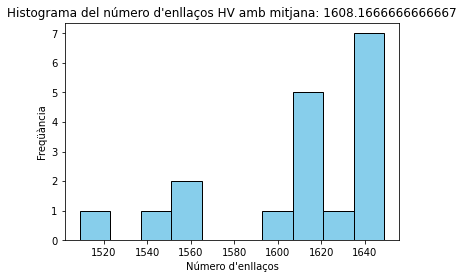

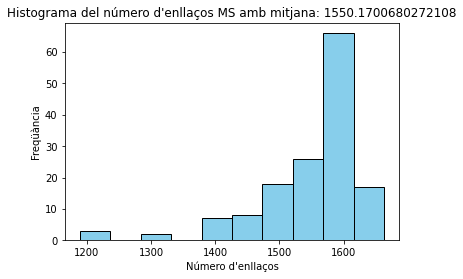

In [47]:
import matplotlib.pyplot as plt

edges_HV = list(df[df['controls_ms'] == 0]['edges'])
edges_MS = list(df[df['controls_ms'] == 1]['edges'])

# Crear un histograma edges_HV
plt.hist(edges_HV, color='skyblue', edgecolor='black')
plt.xlabel('Número d\'enllaços')
plt.ylabel('Freqüància')
plt.title(f'Histograma del número d\'enllaços HV amb mitjana: {np.mean(edges_HV)}')
plt.show()

# Crear un histograma edges_MS
plt.hist(edges_MS, color='skyblue', edgecolor='black')
plt.xlabel('Número d\'enllaços')
plt.ylabel('Freqüància')
plt.title(f'Histograma del número d\'enllaços MS amb mitjana: {np.mean(edges_MS)}')
plt.show()

* **Col·lapse de Xarxa**
<br>
Finalment, intentarem aproximar-nos a entendre el punt de col·lapse de xarxa, on a partir de l’eliminació de nodes d’una xarxa estructural i funcionalment sana, i a través d’anàlisis estadı́stics i caracterització de xarxes cerebrals, es determinarà el punt de desequilibri entre voluntaris sans i pacients amb Esclerosis Múltiple.

In [48]:
import joblib

# S'han d'utilitzar aquestes connexions, per dur a terme prediccions:
llistat_columnes_analitzar = ['0-1', '0-7', '0-15', '0-32', '0-37', '0-38', '0-45', '0-46', '0-54', '0-60', '0-62', '0-66', '0-68', '1-7', '1-30', '1-31', '1-33', '1-34', '1-39', '1-40', '1-45', '2-6', '2-26', '2-32', '2-34', '3-6', '3-8', '3-22', '4-7', '4-27', '4-36', '5-6', '5-14', '5-15', '5-17', '5-20', '5-72', '6-8', '6-9', '6-15', '6-27', '6-34', '6-37', '7-8', '7-12', '7-23', '7-25', '7-34', '7-35', '7-40', '7-50', '7-57', '7-59', '7-64', '7-65', '7-72', '8-9', '8-12', '8-27', '8-30', '8-31', '8-33', '8-34', '8-36', '8-38', '9-12', '9-22', '9-36', '9-38', '9-44', '9-54', '9-62', '10-30', '10-31', '10-33', '10-34', '10-35', '10-36', '10-38', '11-27', '11-30', '11-33', '11-36', '11-38', '11-40', '11-42', '11-62', '11-75', '12-15', '12-26', '12-27', '12-32', '12-38', '12-44', '13-31', '13-33', '13-38', '14-15', '14-20', '14-27', '14-30', '14-31', '14-33', '14-41', '14-50', '14-57', '14-65', '15-20', '15-31', '15-32', '15-38', '15-39', '15-45', '16-39', '16-62', '17-39', '17-45', '17-60', '18-26', '18-27', '18-30', '18-31', '18-33', '18-34', '18-35', '18-36', '18-38', '19-20', '19-30', '19-31', '19-32', '19-33', '19-34', '19-41', '19-52', '19-57', '19-65', '19-72', '20-23', '20-30', '20-31', '20-33', '20-50', '20-52', '20-64', '20-67', '20-71', '20-72', '21-31', '21-33', '21-39', '21-65', '21-72', '22-23', '22-30', '22-38', '22-40', '22-41', '22-65', '22-75', '23-31', '23-38', '23-40', '23-45', '23-54', '23-61', '23-62', '24-30', '24-31', '24-38', '24-39', '24-41', '24-45', '24-57', '25-27', '25-30', '25-33', '25-39', '25-41', '25-45', '25-59', '25-65', '26-30', '26-38', '26-40', '26-41', '26-42', '26-51', '26-55', '26-65', '27-34', '27-38', '27-39', '27-40', '27-44', '28-31', '28-32', '28-33', '28-35', '28-74', '29-30', '29-71', '30-35', '30-37', '30-42', '30-50', '30-61', '31-35', '31-38', '31-39', '31-40', '31-41', '31-42', '31-44', '31-45', '31-50', '31-53', '31-59', '31-63', '32-35', '32-38', '32-39', '32-40', '32-44', '32-45', '32-54', '32-59', '32-62', '32-64', '33-34', '33-38', '33-39', '33-40', '33-41', '33-52', '33-56', '33-60', '34-38', '34-39', '34-59', '34-71', '35-36', '35-37', '35-39', '35-44', '35-56', '35-67', '35-71', '36-38', '37-39', '37-40', '37-44', '37-69', '38-44', '38-45', '38-46', '38-52', '38-64', '38-68', '38-70', '38-71', '38-73', '38-74', '39-44', '39-45', '39-49', '39-59', '39-65', '39-66', '40-44', '40-45', '40-50', '40-55', '40-56', '40-58', '40-60', '40-71', '41-44', '41-45', '41-63', '41-64', '41-70', '41-71', '41-73', '42-44', '42-55', '42-61', '42-64', '42-73', '43-44', '43-50', '43-53', '43-55', '43-71', '44-45', '44-54', '44-61', '44-63', '44-69', '45-46', '45-60', '45-62', '45-66', '46-65', '47-53', '47-55', '47-63', '47-69', '47-70', '47-75', '48-71', '49-54', '49-55', '49-56', '49-63', '49-75', '50-52', '50-55', '50-63', '50-65', '50-75', '51-56', '51-58', '51-60', '51-66', '52-58', '52-65', '52-68', '52-75', '53-61', '53-63', '53-64', '53-66', '53-69', '53-72', '53-73', '53-74', '53-75', '54-58', '54-60', '55-61', '55-63', '55-69', '55-72', '55-75', '56-67', '57-67', '57-75', '58-70', '59-65', '59-72', '60-64', '60-71', '62-64', '62-71', '63-72', '63-75', '64-65', '65-66', '65-68', '65-72', '67-75', '69-71']

#['0-1','0-7','0-15','0-32','0-37','0-38','0-45','0-46','0-54','0-60','0-66','1-7','1-21','1-31','1-33','1-39','1-45','2-6','2-11','2-18','2-32','2-34','2-36','2-38','3-6','3-22','4-7','4-27','4-34','4-50','5-6','5-12','5-20','5-36','5-38','5-40','5-59','5-66','5-72','5-73','6-15','6-27','7-8','7-12','7-25','7-38','7-40','7-50','7-52','7-59','7-64','7-65','7-72','7-75','8-9','8-23','8-27','8-30','8-31','8-33','8-34','8-35','8-36','8-38','8-57','9-10','9-22','9-36','9-38','9-44','9-54','9-57','9-62','9-69','9-70','9-75','10-23','10-31','10-33','10-34','10-35','10-36','10-38','10-72','11-12','11-33','11-36','11-40','11-42','11-44','11-54','11-62','11-69','11-75','12-20','12-26','12-44','12-51','12-52','13-31','13-33','13-35','14-20','14-30','14-33','14-41','14-52','14-65','14-72','15-20','15-31','15-39','15-45','16-39','16-62','17-39','17-45','18-27','18-30','18-31','18-33','18-34','18-36','18-37','18-38','19-20','19-31','19-32','19-33','19-34','19-40','19-41','19-50','19-52','19-57','19-65','19-72','20-23','20-31','20-33','20-50','20-52','20-57','20-64','20-65','20-66','20-72','21-32','21-39','21-65','21-72','22-23','22-36','22-38','22-40','22-41','22-65','22-72','22-75','23-26','23-31','23-33','23-38','23-40','23-45','23-54','23-61','23-69','24-39','24-40','24-41','24-45','24-57','24-60','24-65','25-27','25-30','25-39','25-41','25-45','25-59','25-60','25-65','26-30','26-38','26-40','26-41','26-42','26-55','26-65','26-72','26-75','27-32','27-33','27-38','27-39','27-40','28-31','28-32','28-33','28-51','28-65','29-30','30-31','30-37','30-39','30-42','30-50','30-52','31-35','31-38','31-39','31-40','31-41','31-42','31-44','31-45','31-50','31-52','31-56','31-63','32-38','32-39','32-40','32-44','32-45','32-59','32-62','33-34','33-35','33-37','33-38','33-39','33-40','33-41','33-44','33-50','33-56','34-38','34-39','34-59','35-36','35-39','35-44','35-49','35-52','35-56','35-67','35-71','36-38','37-44','37-69','38-39','38-42','38-44','38-45','38-46','38-52','38-53','38-64','38-73','38-74','39-44','39-45','39-65','40-42','40-43','40-44','40-45','40-53','40-56','40-68','41-44','41-45','41-70','41-73','42-44','42-55','42-64','42-66','42-73','43-44','43-50','44-56','44-61','44-63','45-46','45-54','45-56','45-60','45-62','46-65','46-72','47-55','47-63','47-73','47-75','49-54','49-55','49-56','49-75','50-52','50-55','50-60','50-65','50-75','51-56','51-58','51-60','51-66','52-65','53-63','53-69','53-72','53-73','53-75','54-67','55-61','55-69','55-72','55-75','56-67','57-60','57-65','57-75','58-70','59-65','59-72','60-71','62-64','62-71','63-72','63-75','64-65','65-66','65-68','67-72','67-75','69-71','71-72']

# Importem el model amb el que hem obtingut una accuracy del 97% (SVM).
model_RFC = joblib.load('./models/model_RFC.joblib')
model_SVM = joblib.load('./models/model_SVM.joblib')
model_KNN = joblib.load('./models/model_KNN.joblib')
model_LR = joblib.load('./models/model_LR.joblib')
model_GNB = joblib.load('./models/model_GNB.joblib')



In [49]:
import random
steps_llistat = list()

for iteration in range(0, 20):   

    # Obtenim a l'atzar una xarxa d'un voluntari sa.
    random_number = random.randint(0, 17)

    # Obtenim la matriu del voluntari sa.
    df_study = df[df['controls_ms'] == 0]['matrix'].reset_index().iloc[random_number]['matrix']

    # S'obté la matriu superior.
    matrix_study = np.triu(df_study)[np.triu_indices_from(df_study, k=1)]
    #matrix_study.shape

    # Es crea un diccionari amb totes les connexions de la matriu superior.
    dades_columnes_analitzar = dict()
    connexio = 0

    for i in range(0, 76):
        for j in range(i+1, 76):
            dades_columnes_analitzar[f"{i}-{j}"] = [matrix_study[connexio]]
            connexio += 1

    # Creem el dataframe amb el registre que volem predir.
    df_to_predict = pd.DataFrame(dades_columnes_analitzar)[llistat_columnes_analitzar]

    # Duem a terme les prediccions.
    y_pred_RFC = model_RFC.predict(df_to_predict)
    y_pred_SVM = model_SVM.predict(df_to_predict)
    y_pred_KNN = model_KNN.predict(df_to_predict)
    y_pred_LR = model_LR.predict(df_to_predict)
    y_pred_GNB = model_GNB.predict(df_to_predict)

    #print(f"Predicció amb RFC: {y_pred_RFC}")
    #print(f"Predicció amb SVM: {y_pred_SVM}")
    #print(f"Predicció amb KNN: {y_pred_KNN}")
    #print(f"Predicció amb LR: {y_pred_LR}")
    #print(f"Predicció amb GNB: {y_pred_GNB}")

    ensemble_prediction = 1 if sum([y_pred_RFC, y_pred_SVM, y_pred_KNN, y_pred_LR, y_pred_GNB]) >= 3 else 0
    print(f"Predicció Ensemble Models: {ensemble_prediction}")

    # Iterem fins que els models prediguin que la matriu es d'un pacient amb EM.
    step_iteration = 0
    while ensemble_prediction == 0:
        # Obtenim totes les posicions de la matriu que son 0.
        llistat_positions_zeros = [i for i, value in enumerate(list(matrix_study)) if value == 0]

        # Obtenim un valor aleatori entre 0 i 2850, que no estigui marcat com a 0.
        while True:
            random_number = random.randint(0, 2849)
            if random_number not in llistat_positions_zeros:
                break

        # S'elimina la connexió obtinguda de forma aleatoria de la matriu d'un voluntari sa.
        matrix_study[random_number] = 0

        # Es crea un diccionari amb totes les connexions de la matriu superior.
        dades_columnes_analitzar = dict()
        connexio = 0

        for i in range(0, 76):
            for j in range(i+1, 76):
                dades_columnes_analitzar[f"{i}-{j}"] = [matrix_study[connexio]]
                connexio += 1

        # Creem el dataframe amb el registre que volem predir.
        df_to_predict = pd.DataFrame(dades_columnes_analitzar)[llistat_columnes_analitzar]

        # Duem a terme les prediccions.
        y_pred_RFC = model_RFC.predict(df_to_predict)
        y_pred_SVM = model_SVM.predict(df_to_predict)
        y_pred_KNN = model_KNN.predict(df_to_predict)
        y_pred_LR = model_LR.predict(df_to_predict)
        y_pred_GNB = model_GNB.predict(df_to_predict)

        ensemble_prediction = 1 if sum([y_pred_RFC, y_pred_SVM, y_pred_KNN, y_pred_LR, y_pred_GNB]) >= 3 else 0
        print(f"Predicció Ensemble Models: {ensemble_prediction}")

        # s'incrementa el valor d'iteració.
        step_iteration += 1

    print(f"S'han necessitat {step_iteration} iteracions eliminant connexions a l'atzar, per tal d'obtenir una matriu d'un pacient amb EM.")
    
    steps_llistat.append(step_iteration)
    

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 1
S'han necessitat 182 iteracions eliminant connexions a l'atzar, per tal d'obtenir una matriu d'un pacient amb EM.
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemb

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 1
S'han necessitat 594 iteracions eliminant connexions a l'atzar, per tal d'obtenir una matriu d'un pacient amb EM.
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemb

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ensemble Models: 0
Predicció Ense

In [50]:
np.mean(steps_llistat)

342.6